# Hello Pytorch

Hello, this is introductory notebook based on https://pytorch.org/tutorials/beginner/basics

# Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and
NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see `bridge-to-np-label`). Tensors
are also optimized for automatic differentiation (we'll see more about that later in the [Autograd](autogradqs_tutorial.html)_
section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

In [1]:
import torch
import numpy as np

## Initialization

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

Fortunately, most of the operations on numpy arrays work the same way for torch tensors.

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8226, 0.4494],
        [0.8105, 0.3963]]) 



## Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [5]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Computation Graph and Gradients

In [6]:
x = torch.ones((3,))
print(x.requires_grad)
x.requires_grad_(True)
print(x.requires_grad)

False
True


In [7]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)
print(x.grad)

X tensor([0., 1., 2.], requires_grad=True)
None


In [8]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


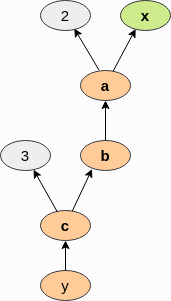

$$ \frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i} $$

In [9]:
y.backward()

Now we indeed computed (and store) gradient

In [10]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


## Arithmetics

In [11]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[0.7819, 0.0551, 0.7642, 0.2841],
        [0.0297, 0.7776, 0.3893, 0.1706],
        [0.8810, 0.6925, 0.8186, 0.1054]])

In [12]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[0.8842, 0.2347, 0.8742, 0.5330],
        [0.1724, 0.8818, 0.6240, 0.4131],
        [0.9386, 0.8322, 0.9048, 0.3247]]) 

tensor([[5.8842, 5.2347, 5.8742, 5.5330],
        [5.1724, 5.8818, 5.6240, 5.4131],
        [5.9386, 5.8322, 5.9048, 5.3247]])


Remember to distinguish between inplace and outplace operations

In [13]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.3726, 0.8352, 0.8067],
        [0.7008, 0.5795, 0.4678]])
X2 (before) tensor([[0.8708, 0.0959, 0.3666],
        [0.9441, 0.6403, 0.5313]])
X1 (after) tensor([[0.3726, 0.8352, 0.8067],
        [0.7008, 0.5795, 0.4678]])
X2 (after) tensor([[1.2434, 0.9311, 1.1733],
        [1.6449, 1.2199, 0.9991]])


## Useful tensor manipulations

**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_,
another tensor joining operator that is subtly different from ``torch.cat``.



In [14]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[5.8842, 5.2347, 5.8742, 5.5330, 5.8842, 5.2347, 5.8742, 5.5330, 5.8842,
         5.2347, 5.8742, 5.5330],
        [5.1724, 5.8818, 5.6240, 5.4131, 5.1724, 5.8818, 5.6240, 5.4131, 5.1724,
         5.8818, 5.6240, 5.4131],
        [5.9386, 5.8322, 5.9048, 5.3247, 5.9386, 5.8322, 5.9048, 5.3247, 5.9386,
         5.8322, 5.9048, 5.3247]])


In [15]:
x = torch.arange(6)
print("X", x)
x = x.view(2, 3)
print("X", x)
x = x.permute(1, 0)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])
X tensor([[0, 1, 2],
        [3, 4, 5]])
X tensor([[0, 3],
        [1, 4],
        [2, 5]])


# CPU

What's the difference

In [16]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

### Performance

In [17]:
import time

Typically we will try to do the heavy computations on GPU. CUDA is a software layer that gives direct access to the GPU's virtual instruction set and parallel computational elements. 

Below it is quite safe command to support your calculations on GPU, although the example below requires access to both
```
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
```

In [ ]:
x = x.to(torch.float32)
## CPU version
start_time = time.time()
_ = torch.matmul(x, x.T)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
device = torch.device("cuda")
x = x.to(device)
_ = torch.matmul(x, x.T)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x.T)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

Expect something like:

CPU time: 0.00256s

GPU time: 0.00016s

Tensors to numpy / scalars

In [20]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

67.61756896972656 <class 'float'>


In [21]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [22]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# Models

In [23]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


We skip standard ML models and jump straigth into NNs.

In [24]:
from torch import nn as nn

In [25]:
IMG_SIZE = 28
NUM_CLASSES = 10

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(IMG_SIZE*IMG_SIZE, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, NUM_CLASSES)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# Data

In [27]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [28]:
import os
data_path = "../data"
os.makedirs(data_path, exist_ok=True)

In [29]:
training_data = datasets.FashionMNIST(
    root=data_path,
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root=data_path,
    train=False,
    download=True,
    transform=ToTensor(),
)

In [30]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## Training

### Loss function (a.k.a. objective function)

Cross entropy: $$ \mathcal{L}_{CE} = - \sum_{i}^{C} y_i log [ f(x_i) ] $$

In [31]:
loss_fn = nn.CrossEntropyLoss()

### Optimizer

In [32]:
LR = 1e-3 # 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

### Training loop

In [33]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

### Testing loop

In [34]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Proceedure

In [35]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.293859  [   64/60000]
loss: 2.282210  [ 6464/60000]
loss: 2.257614  [12864/60000]
loss: 2.260513  [19264/60000]
loss: 2.238016  [25664/60000]
loss: 2.207700  [32064/60000]
loss: 2.215686  [38464/60000]
loss: 2.173347  [44864/60000]
loss: 2.174515  [51264/60000]
loss: 2.143195  [57664/60000]
Test Error: 
 Accuracy: 44.0%, Avg loss: 2.131625 

Epoch 2
-------------------------------
loss: 2.136644  [   64/60000]
loss: 2.127728  [ 6464/60000]
loss: 2.059696  [12864/60000]
loss: 2.088817  [19264/60000]
loss: 2.022884  [25664/60000]
loss: 1.958798  [32064/60000]
loss: 1.994255  [38464/60000]
loss: 1.897739  [44864/60000]
loss: 1.913637  [51264/60000]
loss: 1.843367  [57664/60000]
Test Error: 
 Accuracy: 55.1%, Avg loss: 1.831920 

Epoch 3
-------------------------------
loss: 1.863773  [   64/60000]
loss: 1.832628  [ 6464/60000]
loss: 1.702109  [12864/60000]
loss: 1.764785  [19264/60000]
loss: 1.638395  [25664/60000]
loss: 1.599519  [32064/600

## Saving / Loading

In [36]:
import os
os.makedirs("../models", exist_ok=True)

path_to_model = "../models/model.pth"

torch.save(model.state_dict(), path_to_model)
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [37]:
another_model = NeuralNetwork().to(device)
another_model.load_state_dict(torch.load(path_to_model))

<All keys matched successfully>

In [38]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


# VARIATIONAL AUTOENCODER

More complex model

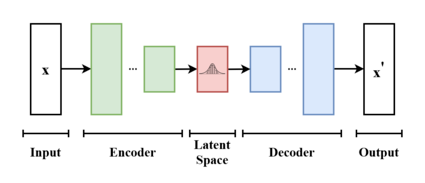

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

import os
import json
import math
import numpy as np

import matplotlib.pyplot as plt
import umap
import pandas as pd
import seaborn as sns
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

/home/mateuszpyla/Pulpit/courses/AS/Automating_Science/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_mean  = nn.Linear(hidden_dim, latent_dim)
        self.fc_var   = nn.Linear (hidden_dim, latent_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
        self.training = True
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x       = self.LeakyReLU(self.fc_1(x))
        x       = self.LeakyReLU(self.fc_2(x))
        mean     = self.fc_mean(x)
        log_var  = self.fc_var(x)
        
        return mean, log_var

In [41]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc_1 = nn.Linear(latent_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_3 = nn.Linear(hidden_dim, output_dim)
        
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h     = self.LeakyReLU(self.fc_1(x))
        h     = self.LeakyReLU(self.fc_2(h))
        
        x_hat = torch.sigmoid(self.fc_3(h))
        x_hat = x_hat.view([-1, 1, 28, 28])
        return x_hat
        

In [42]:
class VAE(nn.Module):
    def __init__(self, x_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
        self.decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

        
    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(device)        # sampling epsilon        
        z = mean + var * epsilon                          # reparameterization trick
#         z = mean # Change to proper sampling
        return z
        
                
    def forward(self, x):
        mean, log_var = self.encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var)
        x_hat = self.decoder(z)
        return x_hat, mean, log_var

Data

In [43]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = FashionMNIST(root="../data/", train=True, transform=transform, download=True)
test_set = FashionMNIST(root="../data/", train=False, transform=transform, download=True)

train_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
test_loader = data.DataLoader(test_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)

### Exercise (skip for now, come back upon the completion of the notebook)

Create validation dataset and dataloader

In [ ]:
# write your code

Device

In [44]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Device: cpu


Model

In [45]:
vae = VAE(latent_dim=32, hidden_dim=256, x_dim=784).to(device)

In [46]:
def vae_loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    KLD      = -0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD

In [47]:
criterion1 = nn.MSELoss(reduction="sum")
criterion2 = vae_loss_function

In [48]:
criterion = criterion1
optimizer = optim.Adam(vae.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.99)

In [49]:
num_epochs = 30
for n in range(num_epochs):
    losses_epoch = []
    for x, _ in iter(train_loader):
        x = x.to(device)
        out, means, log_var = vae(x)
        loss = criterion(out, x) 
        losses_epoch.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()  
    L1_list = []
    for x, _ in iter(test_loader):
        x  = x.to(device)
        out, _, _ = vae(x)
        L1_list.append(torch.mean(torch.abs(out-x)).item())
    print(f"Epoch {n} loss {np.mean(np.array(losses_epoch))}, test L1 = {np.mean(L1_list)}")
    scheduler.step()

Epoch 0 loss 8876.388394347623, test L1 = 0.09223560262471438
Epoch 1 loss 4365.161724384015, test L1 = 0.07898303102701902
Epoch 2 loss 3678.9419686081064, test L1 = 0.0729270638898015
Epoch 3 loss 3292.4941771417602, test L1 = 0.06917120311409235
Epoch 4 loss 3052.81205866887, test L1 = 0.06666892459616065
Epoch 5 loss 2874.8659323667866, test L1 = 0.06395239988341928
Epoch 6 loss 2686.24713291266, test L1 = 0.06180146364495158
Epoch 7 loss 2548.845670781584, test L1 = 0.060135999042540786
Epoch 8 loss 2436.7094142294336, test L1 = 0.058516275230795146
Epoch 9 loss 2345.0868097288994, test L1 = 0.05741296382620931
Epoch 10 loss 2274.9096481453657, test L1 = 0.05633613793179393
Epoch 11 loss 2208.496792263455, test L1 = 0.05560769122093916
Epoch 12 loss 2154.0371224167, test L1 = 0.05532955387607217
Epoch 13 loss 2111.1297836955796, test L1 = 0.05397335151210427
Epoch 14 loss 2062.7201193785054, test L1 = 0.053394042607396844
Epoch 15 loss 2024.7259411934094, test L1 = 0.0529863475821

### Exercise

Plot the L1 and loss on y-axis (as the functions of time)

In [ ]:
# write your code

In [54]:
def visualize_reconstructions(model, input_imgs, device):
    # Reconstruct images
    model.eval()
    with torch.no_grad():
        reconst_imgs, means, log_var = model(input_imgs.to(device))
    reconst_imgs = reconst_imgs.cpu()
    
    # Plotting
    imgs = torch.stack([input_imgs, reconst_imgs], dim=1).flatten(0,1)
    grid = torchvision.utils.make_grid(imgs, nrow=4, normalize=False, value_range=(-1,1))
    grid = grid.permute(1, 2, 0)
    if len(input_imgs) == 4:
        plt.figure(figsize=(10,10))
    else:
        plt.figure(figsize=(15,10))
    plt.title(f"Reconstructions")
    plt.imshow(grid)
    plt.axis('off')
    plt.show()

In [55]:
def get_train_images(num):
    return torch.stack([test_set[i][0] for i in range(10,10+num)], dim=0)

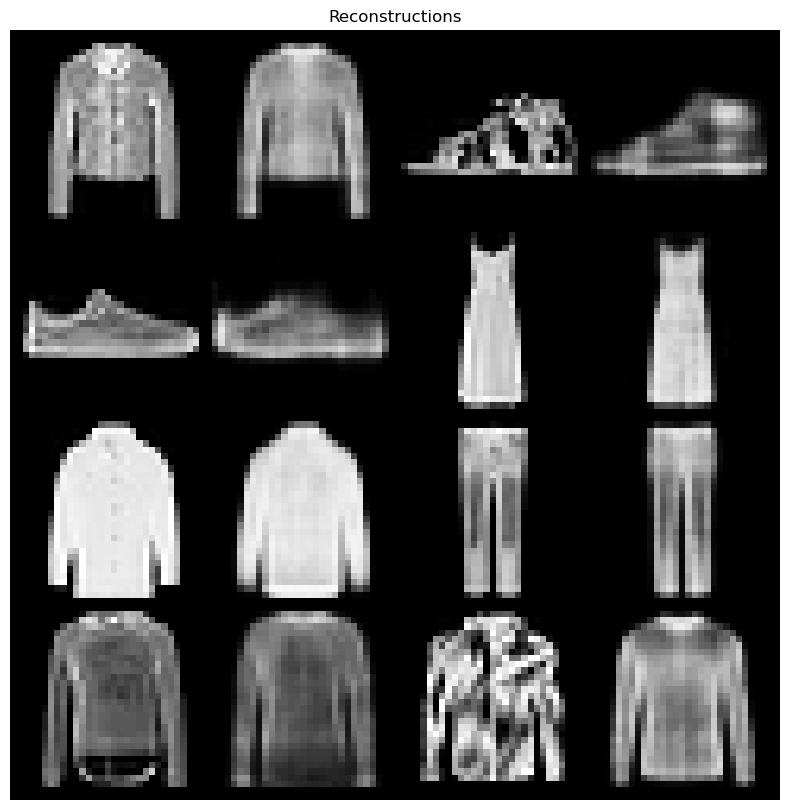

In [56]:
input_imgs = get_train_images(8)
visualize_reconstructions(vae, input_imgs, device)

In [59]:
def generate_images(model, n_imgs, device):
    # Reconstruct images
    model.eval()
    with torch.no_grad():
        generated_imgs = model.decoder(torch.randn([n_imgs, model.latent_dim]).to(device))
    generated_imgs = generated_imgs.cpu()
    
    # Plotting
    # imgs = generated_imgs.flatten(0,1)
    grid = torchvision.utils.make_grid(generated_imgs, nrow=4, normalize=False, value_range=(-1,1))
    grid = grid.permute(1, 2, 0)
    if len(input_imgs) == 4:
        plt.figure(figsize=(10,10))
    else:
        plt.figure(figsize=(15,10))
    plt.title(f"Generations")
    plt.imshow(grid)
    plt.axis('off')
    plt.show()

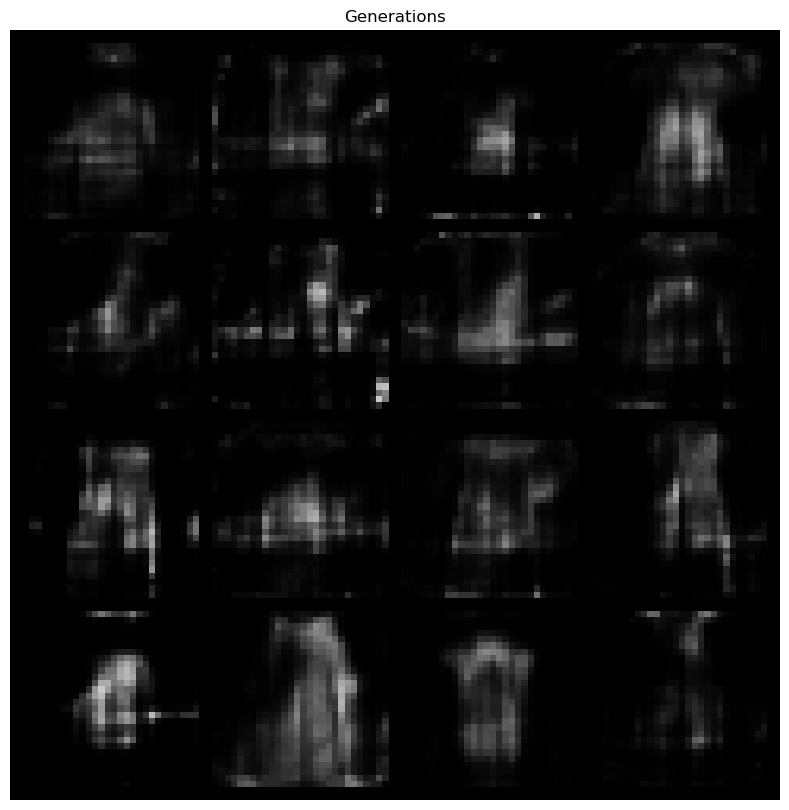

In [60]:
generate_images(vae, 16 , device)

Latent space

In [61]:
def embed_imgs(model, data_loader):
    # Encode all images in the data_laoder using model, and return both images and encodings
    img_list, embed_list = [], []
    model.eval()
    labels = []
    for imgs, label in data_loader:
        with torch.no_grad():
            mean, var_log = model.encoder(imgs.to(device))
        img_list.append(imgs)
        embed_list.append(mean)
        labels.append(label)
    return (torch.cat(img_list, dim=0), torch.cat(embed_list, dim=0), torch.cat(labels, dim=0))


In [62]:
umap_object = umap.UMAP(metric="cosine", n_neighbors=100)
train_img_embeds = embed_imgs(vae, train_loader)
test_img_embeds = embed_imgs(vae, test_loader)
train_embedded = umap_object.fit_transform(train_img_embeds[1][:5000].cpu())

In [63]:
def plot_latent(train_embedded, train_img_embeds, n_data=5000):
    data = pd.DataFrame(train_embedded[:n_data])
    data["label"] = train_img_embeds[2][:n_data].cpu().numpy()
    examples = []
    examples_locations = []
    for i in np.random.randint(0,n_data,40):
        examples.append(train_img_embeds[0][i].squeeze(0).cpu().numpy())
        examples_locations.append(data.iloc[i])
    fig, ax = plt.subplots(figsize=(12, 10))
    # ax.scatter(noises_to_plot_tsne[0],noises_to_plot_tsne[1],c=noises_to_plot_tsne["batch"],s=3,alpha=0.8)
    sns.scatterplot(
        x=0, y=1,
        hue="label",
        palette=sns.color_palette("hls", 10),
        data=data,
        legend="full",
        alpha=0.1
    )
    for location, example in zip(examples_locations, examples):
        x, y = location[0], location[1]
        label = int(location["label"])
        ab = AnnotationBbox(OffsetImage(example,cmap=plt.cm.gray_r, zoom=1), (x, y), frameon=True,
                            bboxprops=dict(facecolor=sns.color_palette("hls", 10)[label], boxstyle="round"))
        ax.add_artist(ab)
    plt.show()

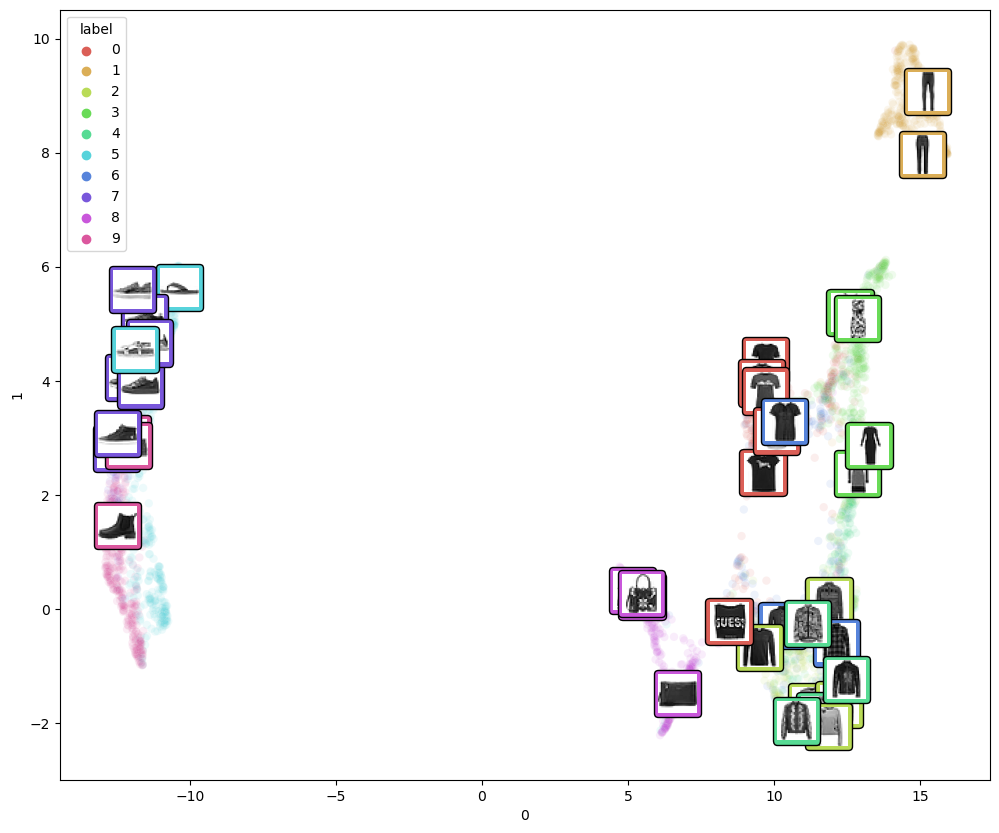

In [64]:
plot_latent(train_embedded, train_img_embeds)

### Exercise

Save and load the model and assert that the performance is better than the randomly initialized one

In [ ]:
# write your code

### Exercise

Try to modify the code in order to get "reasonable" generations

In [73]:
# write your code